This notebook generates accuracy analysis plots for discriminators across epochs for 1000 and 3200 tick intervals.

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [10]:
batch_size = 100
noise_dim = 100
noise = tf.random.normal([batch_size, noise_dim])

with open('fillsplit3200.pickle', 'rb') as f:
    real_sequences = pickle.load(f)
    
real_sequence_subset = real_sequences[:100, :, :, :]

In [21]:
with open('fillsplit1000.pickle', 'rb') as f:
    real_sequences_1000 = pickle.load(f)

real_sequence_subset_1000 = real_sequences_1000[:100, :, :, :]

In [16]:
fake_success = []
real_success = []

for i in range(35):
    gen_path = './bigepochs/gene' + str(i+1)
    dis_path = './bigepochs/dise' + str(i+1)
    generator = tf.keras.models.load_model(gen_path)
    discriminator = tf.keras.models.load_model(dis_path)
    
    gen_seq = generator(noise, training=False)
    
    fake_output = discriminator(gen_seq)
    real_output = discriminator(real_sequence_subset)
    
    fake_rate = (np.array(fake_output) < 0).sum() / 100
    real_rate = (np.array(real_output) > 0).sum() / 100
    
    fake_success.append(fake_rate)
    real_success.append(real_rate)
    

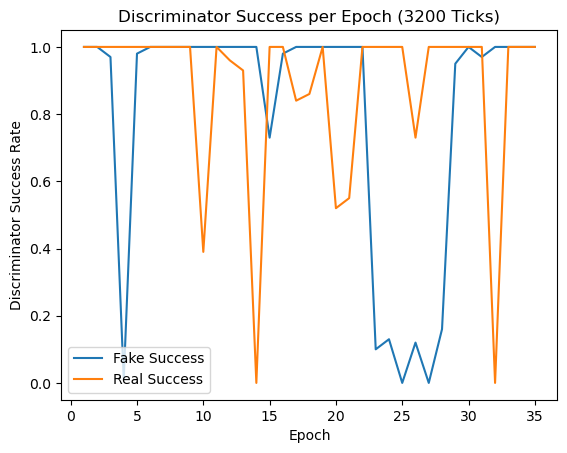

In [25]:
epochs = np.linspace(1,35,35)
plt.plot(epochs, fake_success)
plt.plot(epochs, real_success)
plt.xlabel("Epoch")
plt.ylabel("Discriminator Success Rate")
plt.title("Discriminator Success per Epoch (3200 Ticks)")
plt.legend(["Fake Success", "Real Success"])

In [23]:
fake_success2 = []
real_success2 = []

for i in range(5, 30):
    gen_path = './epochs/gene' + str(i+1)
    dis_path = './epochs/dise' + str(i+1)
    generator = tf.keras.models.load_model(gen_path)
    discriminator = tf.keras.models.load_model(dis_path)
    
    gen_seq = generator(noise, training=False)
    
    fake_output = discriminator(gen_seq)
    real_output = discriminator(real_sequence_subset_1000)
    
    fake_rate = (np.array(fake_output) < 0).sum() / 100
    real_rate = (np.array(real_output) > 0).sum() / 100
    
    fake_success2.append(fake_rate)
    real_success2.append(real_rate)

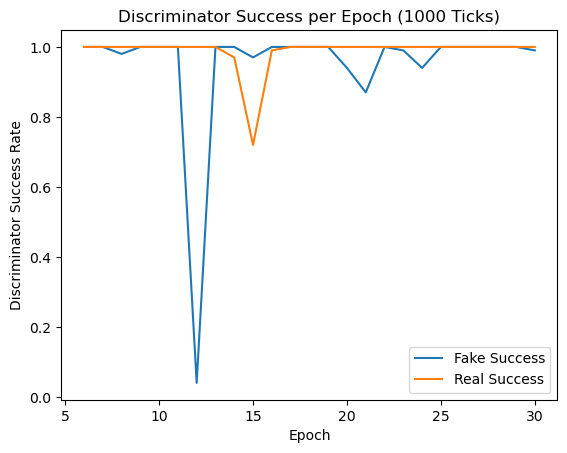

In [27]:
epochs = np.linspace(6,30,25)
plt.plot(epochs, fake_success2)
plt.plot(epochs, real_success2)
plt.xlabel("Epoch")
plt.ylabel("Discriminator Success Rate")
plt.title("Discriminator Success per Epoch (1000 Ticks)")
plt.legend(["Fake Success", "Real Success"])